## Polynomial and overfitting

In [4]:
import numpy as np
x=np.arange(0,11)
y=x**2+30*np.random.rand(11)
print(x,y)
next_x = 11
next_y = float(11**2+30*np.random.rand(1))
print(next_x,'{:.2f}'.format(next_y))

[ 0  1  2  3  4  5  6  7  8  9 10] [  4.82079181   5.53744809  19.40109679   9.00409187  35.00331741
  29.84088498  61.88797445  65.7459631   86.50442463  81.11036185
 100.24149736]
11 144.12


/var/folders/p4/tbffr9s55dj1cl9_z190r81m0000gn/T/ipykernel_49075/1662668197.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  next_y = float(11**2+30*np.random.rand(1))


In [5]:
p2 = np.polyfit(x, y, 2)
p9 = np.polyfit(x, y, 9)
print('2nd order parameters',p2,'\n','9th order parameters',p9)
pf2=np.poly1d(p2)
pf9=np.poly1d(p9)
y2_curve=pf2(np.append(x,next_x))
y9_curve=pf9(np.append(x,next_x))

2nd order parameters [0.4323833  5.86774489 0.90039214] 
 9th order parameters [-4.02098457e-04  1.96865783e-02 -4.04488357e-01  4.52945726e+00
 -3.00102261e+01  1.19207181e+02 -2.72894811e+02  3.22228793e+02
 -1.41490471e+02  4.77824058e+00]


In [12]:
X = np.vstack([x, np.ones(len(x))]).T
print(X)
print(y)
m, c = np.linalg.lstsq(X, y, rcond=None)[0]
print('m,c',m,c)
y2_line=m*next_x+c
print('y2_line',y2_line)
y9_line=m*next_x+c
print('y9_line',y9_line)



[[ 0.  1.]
 [ 1.  1.]
 [ 2.  1.]
 [ 3.  1.]
 [ 4.  1.]
 [ 5.  1.]
 [ 6.  1.]
 [ 7.  1.]
 [ 8.  1.]
 [ 9.  1.]
 [10.  1.]]
[  4.82079181   5.53744809  19.40109679   9.00409187  35.00331741
  29.84088498  61.88797445  65.7459631   86.50442463  81.11036185
 100.24149736]
m,c 10.191577870702568 -5.585357322106516
y2_line 106.52199925562174
y9_line 106.52199925562174


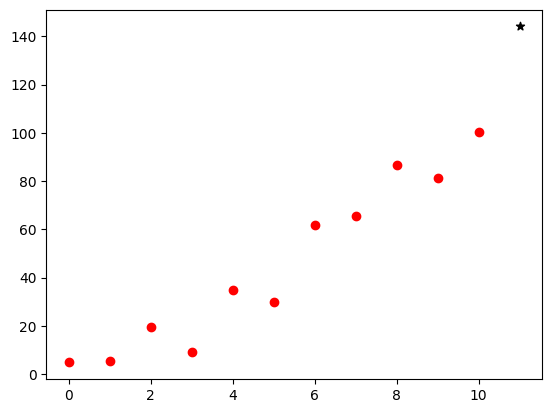

In [13]:
import matplotlib.pyplot as plt
fig= plt.figure()
ax = plt.axes()
ax.scatter(x,y,color='r')
ax.scatter(next_x,next_y,color ='k',marker='*')
plt.show()

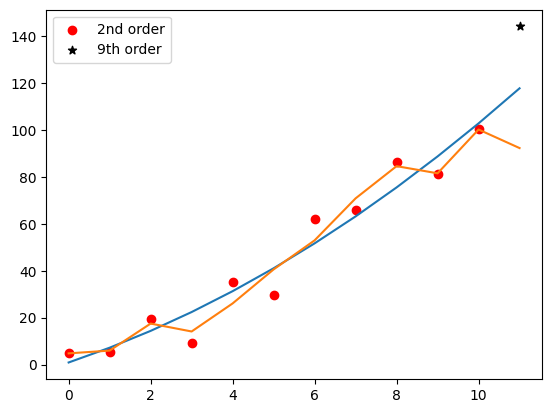

In [14]:
#plotting the two models, we can find that 9th model fit better with all points
import matplotlib.pyplot as plt
fig= plt.figure()
ax = plt.axes()
ax.scatter(x,y,color='r')
ax.scatter(next_x,next_y,color ='k',marker='*')
ax.plot(np.append(x,next_x),y2_curve)
ax.plot(np.append(x,next_x),y9_curve)
ax.legend(['2nd order','9th order'])
plt.show()

In [15]:
#determine the accuracy of the two models
#the result from pf9 gives plenty of error!!!
pred_p2=pf2(next_x)
pred_p9=pf9(next_x)
print(' actual next y: {:.2f}'.format(float(next_y)),'pred from p2: {:.2f}'.format(pred_p2),'pred from p9: {:.2f}'.format(pred_p9),'\n',
      'error from p2',abs(next_y-pred_p2),'\n',
      'error from p9',abs(next_y-pred_p9),'\n')

 actual next y: 144.12 pred from p2: 117.76 pred from p9: 92.29 
 error from p2 26.360837611226444 
 error from p9 51.83015584084373 



## Scikit code: sklearn
A free software machine learning library for the Python programming language. It features various classification, regression and clustering algorithms, and is designed to interoperate with the Python numerical and scientific libraries NumPy and SciPy. Scikit possesses several built-in datasets.

## Processing the dataset: train-test split

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
print(X.shape)
print(y.shape)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)


(11, 2)
(11,)
(8, 2)
(8,)
(3, 2)
(3,)


In [17]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
X, y = data.data, data.target


In [18]:
#count the number of each label
import numpy as np
def count_value(y,y_train, y_test):
  y_count=[]; y_train_count=[]; y_test_count=[];
  for x in np.unique(y):
    temp = np.count_nonzero(y==x)
    y_count.append(temp)
    print('lable {}'.format(x), 'count {}'.format(temp))
  print('y ratio: {}'.format(y_count[0]/y_count[1]))
  for x in np.unique(y_train):
    temp = np.count_nonzero(y_train==x)
    y_train_count.append(temp)
    print('lable {}'.format(x), 'count {}'.format(temp))
  print('y train ratio: {}'.format(y_train_count[0]/y_train_count[1]))
  for x in np.unique(y_test):
    temp = np.count_nonzero(y_test==x)
    y_test_count.append(temp)
    print('lable {}'.format(x), 'count {}'.format(temp))
  print('y test ratio: {}'.format(y_test_count[0]/y_test_count[1]))

In [19]:
# no stratefication
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=None )
count_value(y,y_train, y_test)

lable 0 count 212
lable 1 count 357
y ratio: 0.5938375350140056
lable 0 count 154
lable 1 count 272
y train ratio: 0.5661764705882353
lable 0 count 58
lable 1 count 85
y test ratio: 0.6823529411764706


In [20]:
#with stratefication
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y )
count_value(y,y_train, y_test)

lable 0 count 212
lable 1 count 357
y ratio: 0.5938375350140056
lable 0 count 159
lable 1 count 267
y train ratio: 0.5955056179775281
lable 0 count 53
lable 1 count 90
y test ratio: 0.5888888888888889


Load dataset

preliminary EDA

In [ ]:
X, y = boston.data, boston.target
print(X.shape)
print(y.shape)
print(X)
print(y)


(506, 13)
(506,)
[[6.3200e-03 1.8000e+01 2.3100e+00 ... 1.5300e+01 3.9690e+02 4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9690e+02 9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9283e+02 4.0300e+00]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 5.6400e+00]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9345e+02 6.4800e+00]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 7.8800e+00]]
[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 28.4 21.4 38.7
 43.8 33.2 27.5 26.5 18.6 19.3 20.1 19.5 1

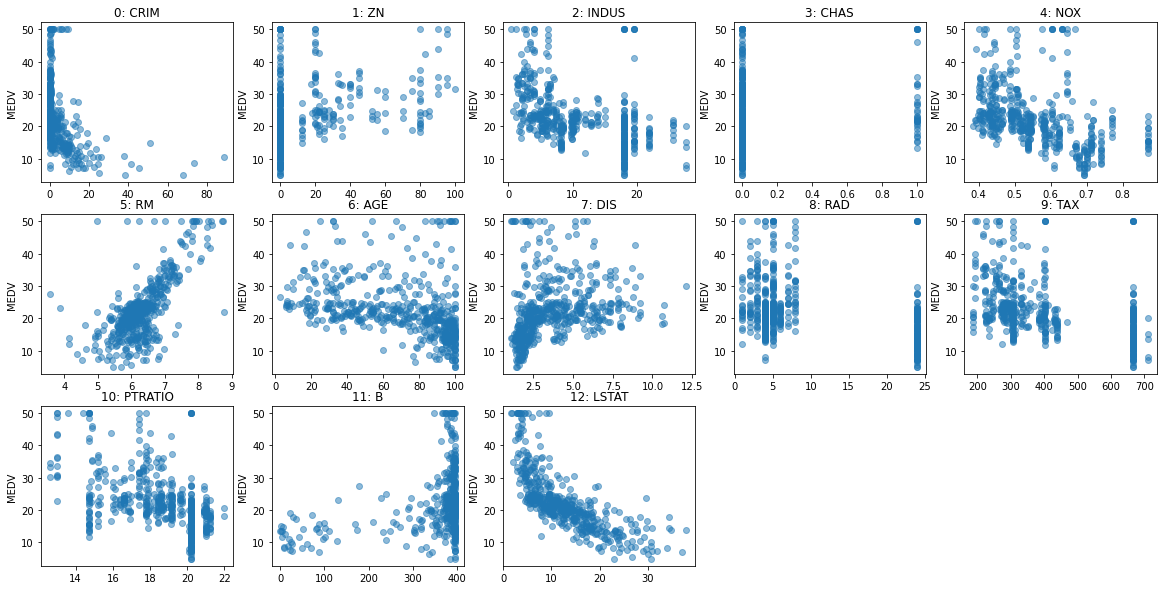

In [ ]:
import matplotlib.pyplot as plt
#Scatter plot for each of the 13 features
fig, axes = plt.subplots(3, 5, figsize=(20, 10))
for i, ax in enumerate(axes.ravel()):
    if i > 12:
        ax.set_visible(False)
        continue
    ax.plot(X[:, i], y, 'o', alpha=.5)
    ax.set_title("{}: {}".format(i, boston.feature_names[i]))
    ax.set_ylabel("MEDV")

Train-test split

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(X, y, train_size=0.7)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(354, 13) (354,)
(152, 13) (152,)


In [ ]:
404/len(y)

0.7984189723320159

## Defining linear regression model

In [ ]:
from sklearn.linear_model import LinearRegression
#create the instance
linreg=LinearRegression()
linreg = linreg.fit(X_train, y_train)

In [ ]:
a=[2,0,1,2.5,0,1,0]
b=[1.0,-1.0,2.0,1.0,-2.0,-1.0,-3.0]
c = [y*x for y,x in zip(a,b)]
print(c)
print(sum(c)+0.5)

[2.0, -0.0, 2.0, 2.5, -0.0, -1.0, -0.0]
6.0


In [ ]:
#Show the model parameters
print("linreg.coef_: {}".format(linreg.coef_))
print("linreg.intercept_: {}".format(linreg.intercept_))
print(len(linreg.coef_))

linreg.coef_: [-9.32122042e-02  5.22600899e-02 -2.92981080e-02  9.20937196e-01
 -1.64149087e+01  4.18761659e+00 -7.37202551e-03 -1.51777215e+00
  3.22182296e-01 -1.54595721e-02 -9.89568444e-01  9.27904198e-03
 -4.06985761e-01]
linreg.intercept_: 34.6404973386263
13


In [ ]:
#Predict the test data
y_predict = linreg.predict(X_test)
print(y_predict.shape)

(152,)


In [ ]:
import numpy as np
x_new=np.random.rand(2,13)
print(x_new)
print(linreg.predict(x_new))

[[0.14171241 0.85622082 0.64602299 0.95215128 0.62239143 0.83791334
  0.75632278 0.84789127 0.76181965 0.19896097 0.05673294 0.76217171
  0.90331375]
 [0.42649317 0.44972129 0.88758161 0.70994435 0.32098152 0.65064144
  0.22792734 0.38622013 0.47699731 0.6764626  0.45052413 0.96252779
  0.25543969]]
[27.35552254 31.72230408]


#### Evaluation Score of the trained and test

In [ ]:
#R2 score (coefficient of determination)
print("Training set score: {:.2f}".format(linreg.score(X_train, y_train)))
print("Test set score: {:.2f}".format(linreg.score(X_test, y_test)))

Training set score: 0.77
Test set score: 0.75


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
# The mean squared error
mse_test=mean_squared_error(y_test, y_predict)
print("Mean squared error: {:.2f}".format(mse_test))

# R2-score: Explained variance score: 1 is perfect prediction
r2_test= r2_score(y_test, y_predict)
print('Variance score: {:.2f}'.format(r2_test))

Mean squared error: 0.06
Variance score: 0.75


## Regularized linear regression

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml
boston = fetch_openml(data_id=531)
X, y = boston.data, boston.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)


/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
alpha = [1, 1000]
for alp in alpha:
  RR = Ridge(alpha=alp)
  RR = RR.fit(X_train_scaled, y_train)
  X_test_scaled = scaler.transform(X_test)
  y_predict = RR.predict(X_test_scaled)
  print(f'alpha values ={alp}')
  print(f"Training set score: {RR.score(X_train_scaled, y_train):.2f}")
  print(f"Test set score: {RR.score(X_test_scaled, y_test):.2f}")
  # The mean squared error
  mse_test=mean_squared_error(y_test, y_predict)
  print(f"Mean squared error: {mse_test:.2f}")
  # R2-score: Explained variance score: 1 is perfect prediction
  r2_test= r2_score(y_test, y_predict)
  print(f'Variance score: {r2_test:.2f}'  )

alpha values =1
Training set score: 0.75
Test set score: 0.68
Mean squared error: 22.12
Variance score: 0.68
alpha values =1000
Training set score: 0.52
Test set score: 0.52
Mean squared error: 33.32
Variance score: 0.52
